### STEP 1 : Loading the Data.

In [57]:
import pandas as pd

In [58]:
survey_raw_df=pd.read_csv('survey_results_public.csv')

In [59]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [60]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [61]:
schema_raw=pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText#converting dataframe to series

In [62]:
schema_raw #series

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [63]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

### STEP 2 : Data Cleaning and Preprocessing

#### While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

#### Demographics of the survey respondents and the global programming community
#### Distribution of programming skills, experience, and preferences
#### Employment-related information, preferences, and opinions
#### Let's select a subset of columns with the relevant data for our analysis

In [64]:
selected_columns=[
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [65]:
survey_df=survey_raw_df[selected_columns].copy()

In [66]:
schema=schema_raw[selected_columns]

In [67]:
#### Basic Information

In [68]:
survey_df.shape

(64461, 20)

In [69]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [70]:
survey_df.describe() #stats

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


In [71]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [72]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [73]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [74]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)

In [75]:
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

In [76]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [77]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [78]:
survey_df.Gender.unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [79]:
import numpy as np

In [80]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)),np.nan,inplace=True)#whereever there is a ; 

In [81]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [82]:
### Analysis

In [83]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
34929,Sweden,35.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,16.0,20.0,9.0,Bash/Shell/PowerShell;C#;C++,Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScri...,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Data or business analyst;Developer, back-end;P...",40.0,Very dissatisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Not at all important/not necessary
46082,Portugal,43.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,11.0,27.0,21.0,C#;HTML/CSS;JavaScript;TypeScript,C#;Kotlin;Python;Scala;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",8.5,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
6637,Switzerland,22.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,16.0,5.0,2.0,C#;HTML/CSS;SQL,C#;HTML/CSS;JavaScript;SQL,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Database administrator;Designer;Developer, des...",42.5,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Very important
36708,Nomadic,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,8.0,8.0,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, front-end;Developer, full-stack",NaN,Neither satisfied nor dissatisfied,NaN,NaN,Not at all important/not necessary
37383,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;SQL,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
8517,Netherlands,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,19.0,10.0,C#;C++;HTML/CSS;JavaScript;SQL;TypeScript,C#;C++;JavaScript;SQL;TypeScript,Every few months,Meditate;Call a coworker or friend;Visit Stack...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",36.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
55397,Tunisia,22.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,16.0,7.0,NaN,HTML/CSS;Java;JavaScript;PHP;SQL,Dart;JavaScript;PHP;Python,Every few months,Visit Stack Overflow,Student,NaN,NaN,NaN,NaN,NaN,NaN
6952,France,43.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,20.0,20.0,10.0,HTML/CSS;Java;JavaScript;PHP;SQL,Java;Kotlin,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, full-stack",NaN,NaN,NaN,NaN,Critically important
57281,India,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,2.0,C;C#;HTML/CSS;Java;JavaScript;SQL,Kotlin;Python;R,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",8.0,Slightly satisfied,Diversity of the company or organization;Offic...,Occasionally: 1-2 days per quarter but less th...,Very important
27288,Singapore,18.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,12.0,8.0,NaN,Bash/Shell/PowerShell;Dart;HTML/CSS;JavaScript...,Assembly;C#;Kotlin;Python;Rust,Once a year,Play games;Call a coworker or friend;Visit Sta...,Student,NaN,NaN,N

## EDA

### Country

In [84]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


#### Number of countries in this survey.

In [ ]:
survey_df.Country.nunique()

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
survey_df.columns

In [ ]:
top_countries=survey_df.Country.value_counts().head(15)

In [ ]:
top_countries#top 15 countries from whwere we get highest no of responses

In [ ]:
#### we can visualize using bar chart


In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(top_countries.index,top_countries);

### Age

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

In [ ]:
# Creating a col Agegroup
age_group=[]
for i in survey_df.Age:
    if i<10:
        age_group.append('less than 10')
    elif i>=10 and i<18:
        age_group.append('10-18')
    elif i>=18 and i<30:
        age_group.append('18-30')
    elif i>=30 and i<45:
        age_group.append('30-45')
    elif i>=45 and i<60:
        age_group.append('45-60')
    elif i>=60:
        age_group.append('older than 60')
    else:
        age_group.append(np.NaN)
survey_df['age_group']=age_group

In [ ]:
survey_df

In [ ]:
### Analysing age_group column
age_group_count=survey_df.age_group.value_counts()

In [ ]:
age_group_count

In [ ]:
plt.figure(figsize=(36,24))
plt.title('Age Groups')
plt.pie(age_group_count,labels=age_group_count.index,autopct='%1.1f%%', startangle=180,colors=['pink','lightgreen','lightblue','orange','yellow']);

### Gender

In [ ]:
gender_counts=survey_df.Gender.value_counts()
gender_counts

In [ ]:

plt.figure(figsize=(64,36))
font = {'weight' : 'bold',
        'size'   : 50}

matplotlib.rc('font', **font)
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',startangle=180);

### Education Level

In [ ]:
schema.EdLevel

In [86]:
survey_df.EdLevel.unique

<bound method Series.unique of 0        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
2                                                    NaN
3        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
4           Bachelor’s degree (B.A., B.S., B.Eng., etc.)
                              ...                       
64456    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
64457                                                NaN
64458                          Primary/elementary school
64459                                                NaN
64460         Other doctoral degree (Ph.D., Ed.D., etc.)
Name: EdLevel, Length: 64306, dtype: object>

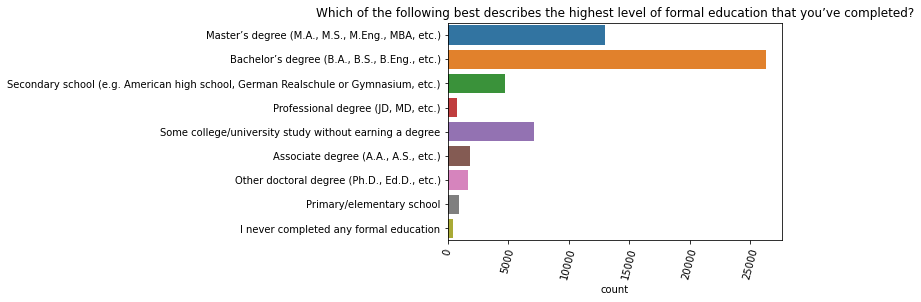

In [87]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

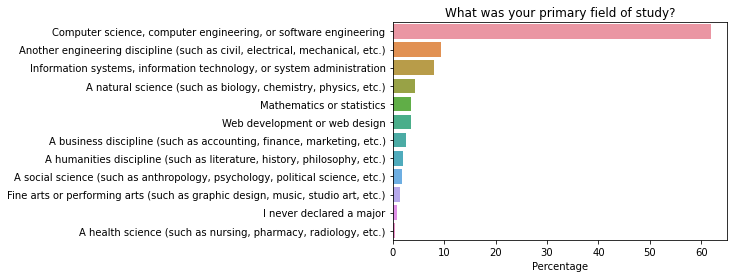

In [85]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

### Employment

In [ ]:
schema.Employment

In [ ]:
survey_df.Employment.unique()

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [ ]:
schema.DevType

In [ ]:
survey_df.DevType.value_counts()

## Asking  and  Answering Questions

### Q: What are the most popular programming languages in 2020?
      

In [30]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [31]:
survey_df.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

In [32]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [33]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [34]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [35]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

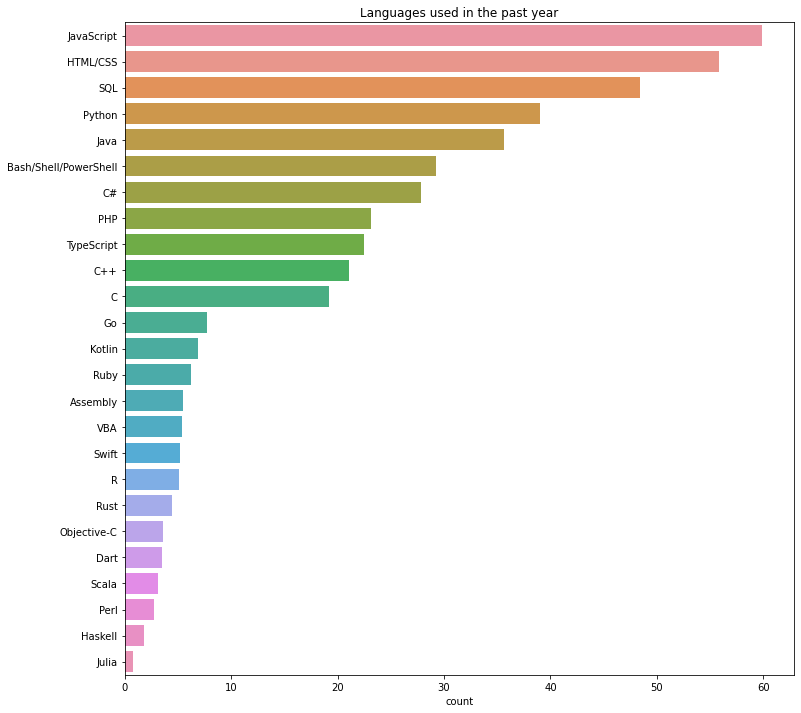

In [38]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

### Q: Which languages are the most people interested to learn over the next year?

In [39]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [40]:
survey_df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [41]:
languages_interested_df=split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

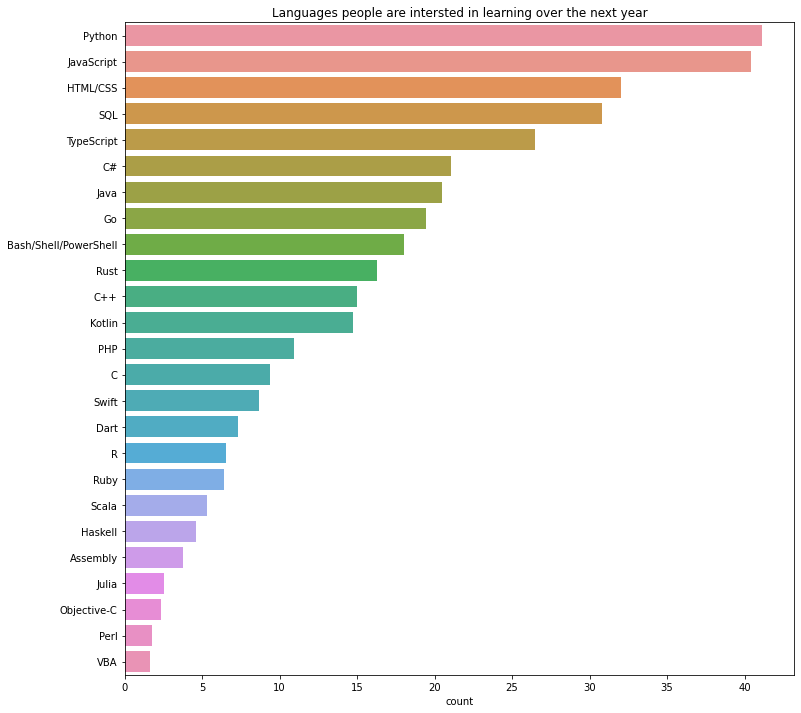

In [42]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

### Q: Which languages are the most people interested to learn over the next year?

In [43]:
languages_loved_df = languages_worked_df & languages_interested_df

In [44]:
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

In [46]:
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

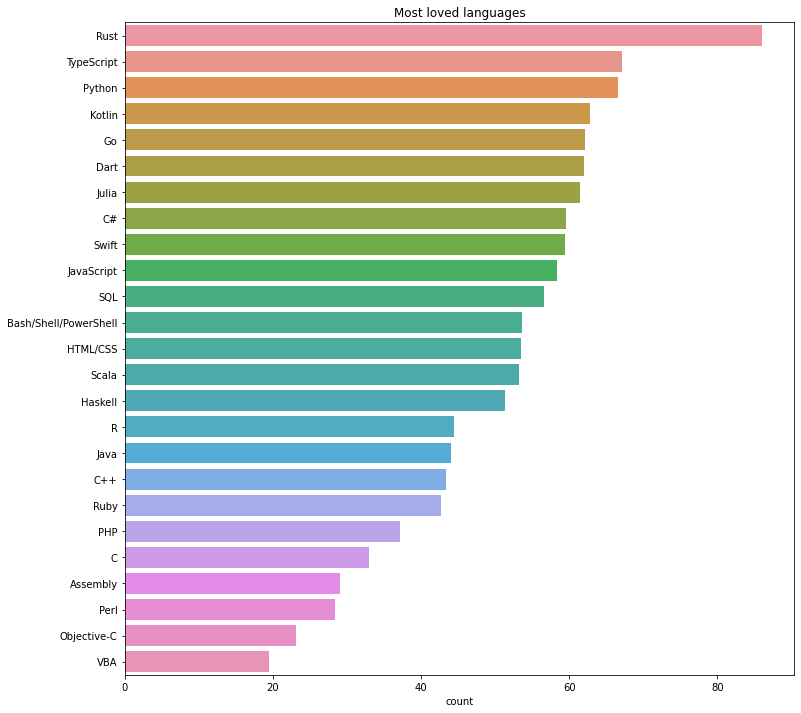

In [47]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [48]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [49]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [50]:
survey_df.Country.value_counts() > 250

United States      True
India              True
United Kingdom     True
Germany            True
Canada             True
                  ...  
Fiji              False
Gabon             False
Nauru             False
Liechtenstein     False
Lesotho           False
Name: Country, Length: 183, dtype: bool

In [54]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [53]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


### Q: How important is it to start young to build a career in programming?

In [55]:
schema.Hobbyist

'Do you code as a hobby?'

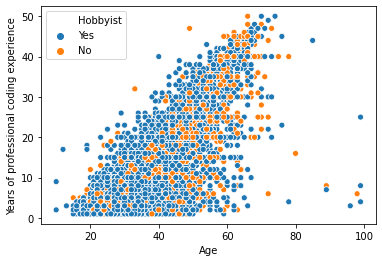

In [56]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

# Inferences and Conclusions

##### 1.Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

##### 2.The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

##### 3.Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

##### 4.A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

##### 5.Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

##### 6.Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

##### 7.Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

##### 8.Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

##### 9.You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.